In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## Open payments dataset:
# https://www.cms.gov/priorities/key-initiatives/open-payments/data/dataset-downloads
# This is a 700 Mb download that expands to an 8Gb (text) datafile.

In [ ]:
p = pd.read_csv("~/data/OP_DTL_GNRL_PGYR2022_P06302023.csv") 

In [85]:
p.shape

(13148520, 91)

In [ ]:
!wc ~/data/OP_DTL_GNRL_PGYR2022_P06302023.csv

In [86]:
p.columns

Index(['Change_Type', 'Covered_Recipient_Type', 'Teaching_Hospital_CCN',
       'Teaching_Hospital_ID', 'Teaching_Hospital_Name',
       'Covered_Recipient_Profile_ID', 'Covered_Recipient_NPI',
       'Covered_Recipient_First_Name', 'Covered_Recipient_Middle_Name',
       'Covered_Recipient_Last_Name', 'Covered_Recipient_Name_Suffix',
       'Recipient_Primary_Business_Street_Address_Line1',
       'Recipient_Primary_Business_Street_Address_Line2', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Recipient_Province', 'Recipient_Postal_Code',
       'Covered_Recipient_Primary_Type_1', 'Covered_Recipient_Primary_Type_2',
       'Covered_Recipient_Primary_Type_3', 'Covered_Recipient_Primary_Type_4',
       'Covered_Recipient_Primary_Type_5', 'Covered_Recipient_Primary_Type_6',
       'Covered_Recipient_Specialty_1', 'Covered_Recipient_Specialty_2',
       'Covered_Recipient_Specialty_3', 'Covered_Recipient_Specialty_4',
       'Covered_Recipie

In [87]:
q= p[["Total_Amount_of_Payment_USDollars", 'Date_of_Payment', 'Nature_of_Payment_or_Transfer_of_Value',
   'Form_of_Payment_or_Transfer_of_Value']]

In [88]:
q

,Total_Amount_of_Payment_USDollars,Date_of_Payment,Nature_of_Payment_or_Transfer_of_Value,Form_of_Payment_or_Transfer_of_Value
0,35.54,10/26/2022,Food and Beverage,In-kind items and services
1,50.00,10/18/2022,Food and Beverage,In-kind items and services
2,50.00,10/18/2022,Food and Beverage,In-kind items and services
3,50.00,10/18/2022,Food and Beverage,In-kind items and services
4,50.00,10/18/2022,Food and Beverage,In-kind items and services
...,...,...,...,...
13148515,33.99,10/14/2022,Food and Beverage,In-kind items and services
13148516,252.64,05/17/2022,Travel and Lodging,Cash or cash equivalent
13148517,54.09,02/11/2022,Food and Beverage,In-kind items and services
13148518,26.74,04/22/2022,Food and Beverage,In-kind items and services


(array([1.3148513e+07, 2.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([1.00000000e-02, 2.53024419e+07, 5.06048839e+07, 7.59073258e+07,
        1.01209768e+08, 1.26512210e+08, 1.51814652e+08, 1.77117093e+08,
        2.02419535e+08, 2.27721977e+08, 2.53024419e+08]),
 <BarContainer object of 10 artists>)

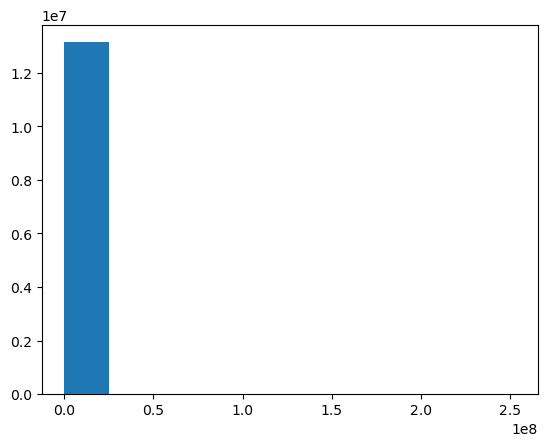

In [89]:
plt.hist(q["Total_Amount_of_Payment_USDollars"])

(array([7.561514e+06, 3.339532e+06, 2.951940e+05, 2.152550e+05,
        2.490370e+05, 2.659790e+05, 2.813130e+05, 1.147420e+05,
        6.071900e+04, 3.424100e+04, 2.857400e+04, 2.285100e+04,
        2.273100e+04, 1.638700e+04, 1.596100e+04, 2.013400e+04,
        1.488200e+04, 1.216600e+04, 1.190500e+04, 8.973000e+03,
        1.179200e+04, 8.231000e+03, 1.000800e+04, 7.220000e+03,
        6.275000e+03, 1.527900e+04, 6.888000e+03, 7.147000e+03,
        6.982000e+03, 5.016000e+03, 9.718000e+03, 5.388000e+03,
        6.637000e+03, 5.492000e+03, 4.682000e+03, 7.408000e+03,
        4.197000e+03, 9.508000e+03, 3.399000e+03, 3.631000e+03,
        6.607000e+03, 3.949000e+03, 3.732000e+03, 4.643000e+03,
        3.234000e+03, 6.374000e+03, 2.966000e+03, 3.274000e+03,
        3.464000e+03]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300., 320., 340., 360., 380., 400., 420.,
        440., 460., 480., 500., 520., 540., 560., 580., 600.

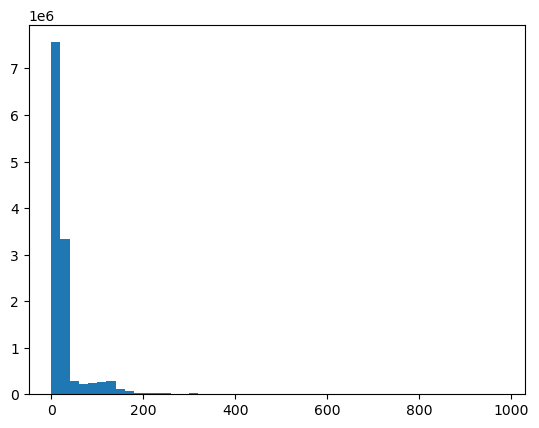

In [121]:
plt.hist(q["Total_Amount_of_Payment_USDollars"] , bins=np.arange(0, 1000,20))

In [ ]:
# This is a completely unacceptable histogram.

In [122]:
(q["Total_Amount_of_Payment_USDollars"] > 1000).sum()

358543

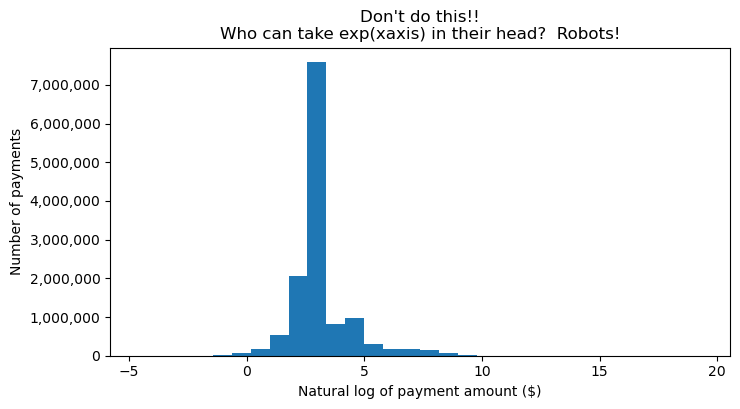

In [90]:
from matplotlib import ticker
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(np.log(q["Total_Amount_of_Payment_USDollars"]), bins=30)
plt.title("Don't do this!!\nWho can take exp(xaxis) in their head?  Robots!")
plt.xlabel("Natural log of payment amount ($)")
plt.ylabel("Number of payments")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

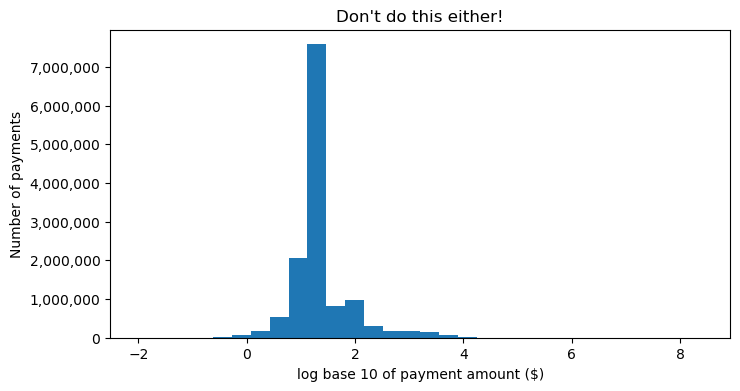

In [91]:
from matplotlib import ticker
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(np.log10(q["Total_Amount_of_Payment_USDollars"]), bins=30)
plt.title("Don't do this either!")
plt.xlabel("log base 10 of payment amount ($)")
plt.ylabel("Number of payments")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

([<matplotlib.axis.XTick at 0x4654515d0>,
 [Text(-2, 0, '$.01'),
  Text(0, 0, '$1'),
  Text(2, 0, '$100'),
  Text(4, 0, '$10k'),
  Text(6, 0, '$1M'),
  Text(8, 0, '$100M')])

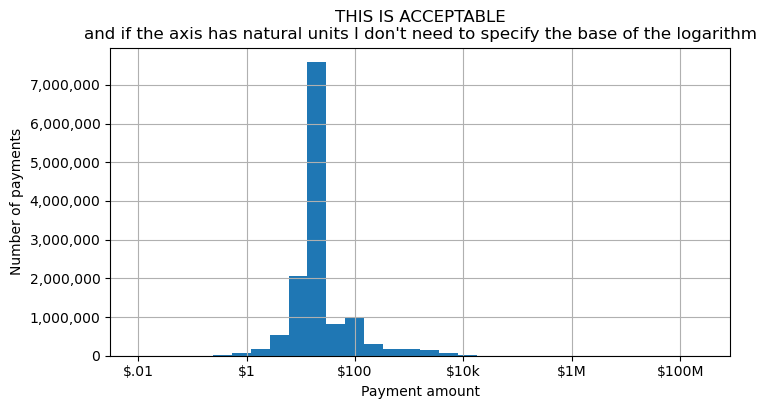

In [92]:
from matplotlib import ticker
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(np.log10(q["Total_Amount_of_Payment_USDollars"]), bins=30)
plt.title("THIS IS ACCEPTABLE\nand if the axis has natural units I don't need to specify the base of the logarithm")
plt.xlabel("Payment amount")
plt.ylabel("Number of payments")
plt.grid()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(np.arange(-2, 9,2), ["$.01", "$1", "$100", "$10k", "$1M", "$100M"]) 

In [94]:
np.arange(0, 5, 0.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75])

In [96]:
bins = np.power(10, np.arange(0, 5, 0.25))
bins

array([1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04])

(array([8.390800e+04, 1.662540e+05, 4.070000e+05, 7.905380e+05,
        4.660756e+06, 4.423559e+06, 5.479930e+05, 5.059680e+05,
        7.179070e+05, 1.636700e+05, 1.236770e+05, 1.112300e+05,
        1.305950e+05, 1.192580e+05, 7.784700e+04, 2.344500e+04,
        1.015000e+04, 4.560000e+03, 2.268000e+03]),
 array([1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
        1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
        1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
        1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
        1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04]),
 <BarContainer object of 19 artists>)

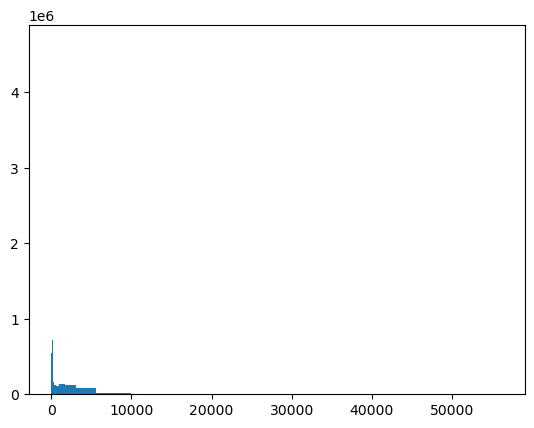

In [97]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins=bins)

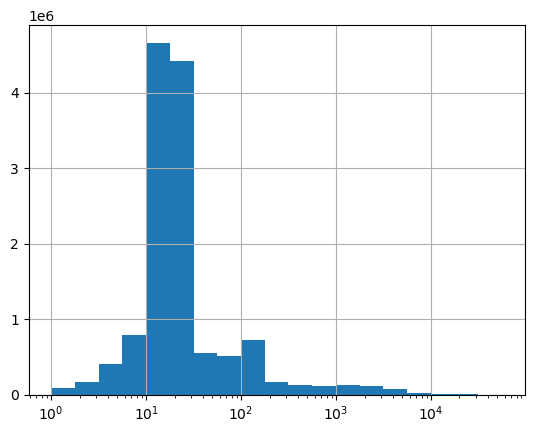

In [101]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins=bins)
plt.xscale("log")
plt.grid("minor")

In [102]:
q["Nature_of_Payment_or_Transfer_of_Value"].value_counts()

Nature_of_Payment_or_Transfer_of_Value
Food and Beverage                                                                                                                                     12006783
Travel and Lodging                                                                                                                                      464192
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program      227671
Consulting Fee                                                                                                                                          164929
Education                                                                                                                                               158752
Gift                                                                                                                                                     34353
Compens

In [103]:
q.groupby("Nature_of_Payment_or_Transfer_of_Value")['Total_Amount_of_Payment_USDollars'].sum()

Nature_of_Payment_or_Transfer_of_Value
Acquisitions                                                                                                                                          5.143595e+08
Charitable Contribution                                                                                                                               5.407787e+06
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program    5.304515e+08
Compensation for serving as faculty or as a speaker for a medical education program                                                                   4.392165e+07
Consulting Fee                                                                                                                                        4.798773e+08
Current or prospective ownership or investment interest                                                                                           

In [104]:
q.groupby("Nature_of_Payment_or_Transfer_of_Value")['Total_Amount_of_Payment_USDollars'].sum()/1E6

Nature_of_Payment_or_Transfer_of_Value
Acquisitions                                                                                                                                           514.359534
Charitable Contribution                                                                                                                                  5.407787
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program     530.451484
Compensation for serving as faculty or as a speaker for a medical education program                                                                     43.921649
Consulting Fee                                                                                                                                         479.877253
Current or prospective ownership or investment interest                                                                                                

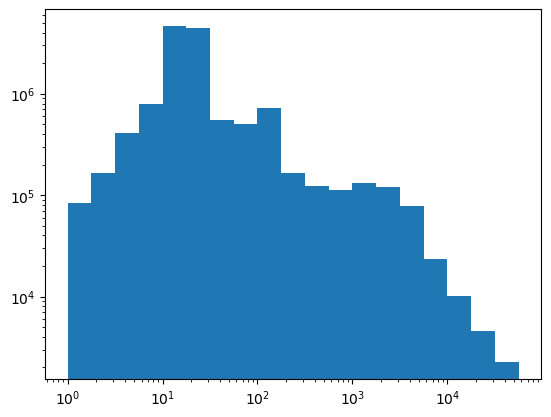

In [105]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins=bins)
plt.xscale("log")
plt.yscale("log")

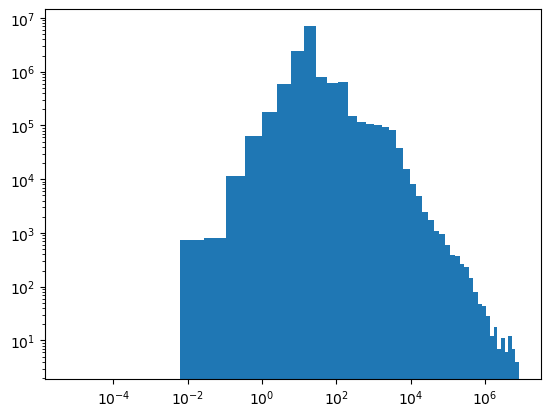

In [106]:

plt.hist(q["Total_Amount_of_Payment_USDollars"], bins= np.power(np.arange(0.3, 5, 0.1), 10))
plt.xscale("log")
plt.yscale("log")


(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 7.490000e+02,
        8.180000e+02, 1.161500e+04, 6.412100e+04, 1.766390e+05,
        5.932910e+05, 2.393900e+06, 7.133328e+06, 7.958860e+05,
        6.169670e+05, 6.350110e+05, 1.474170e+05, 1.154010e+05,
        1.077660e+05, 1.036360e+05, 9.439000e+04, 8.326700e+04,
        3.768400e+04, 1.521200e+04, 8.105000e+03, 4.813000e+03,
        2.411000e+03, 1.735000e+03, 1.105000e+03, 9.670000e+02,
        5.910000e+02, 3.840000e+02, 3.720000e+02, 2.640000e+02,
        2.300000e+02, 1.460000e+02, 7.900000e+01, 4.800000e+01,
        4.400000e+01, 2.800000e+01, 1.200000e+01, 1.800000e+01,
        7.000000e+00, 1.100000e+01, 6.000000e+00, 1.200000e+01,
        7.000000e+00, 4.000000e+00]),
 array([5.90490000e-06, 1.04857600e-04, 9.76562500e-04, 6.04661760e-03,
        2.82475249e-02, 1.07374182e-01, 3.48678440e-01, 1.00000000e+00,
        2.59374246e+00, 6.19173642e+00, 1.37858492e+01, 2.89254655e+01,
        5.76650391e+01, 1.09951163e+02, 2.

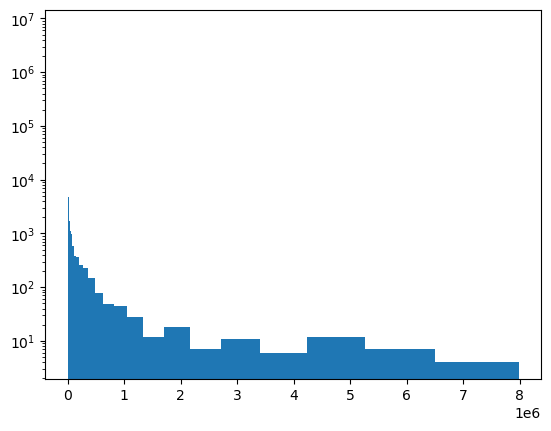

In [107]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins= np.power(np.arange(0.3, 5, 0.1), 10), 
        log=True)


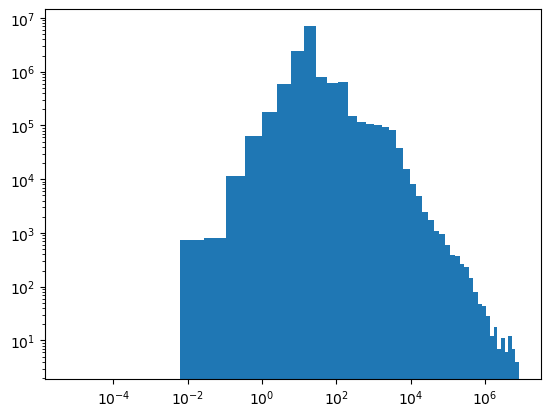

In [108]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins= np.power(np.arange(0.3, 5, 0.1), 10), 
        log=True)
plt.xscale("log")

In [ ]:
# Something is funny on the left hand side of this graph: matplotlib 
# doesn't like plotting bars narrower than .01 or something like that.  

In [109]:
import altair as alt
alt.Chart(q.sample(4000)).mark_bar().encode(
    alt.X('Total_Amount_of_Payment_USDollars:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

alt.Chart(...)

In [ ]:
import altair as alt
alt.Chart(q.sample(4000)).mark_bar().encode(
    alt.X('Total_Amount_of_Payment_USDollars:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

In [ ]:
# Log-bins in altiar seem to require some .transform() calculations
#  https://github.com/vega/vega-lite/issues/4792

In [116]:
from scipy.stats import uniform, poisson
z = uniform.rvs(-90, 180, size=900)
z

array([-2.92732576e+01, -3.43054758e+01,  7.50022670e+01, -8.00017291e+01,
        3.86586770e+01, -3.07550115e+01,  2.03524462e+01, -6.17775223e+01,
        5.24984142e+01,  2.19424914e+01,  7.63834225e+01, -4.95526047e+01,
       -4.37116221e+01,  8.76195949e+00, -6.05889037e+01,  1.34146472e+01,
       -6.45068076e+01, -1.73285986e+01,  5.24301561e+00,  7.71470356e+01,
       -2.56978464e+01,  5.45573545e+01, -3.11451476e+01, -1.14439411e+01,
        8.08401994e+01,  2.85152025e+01,  3.16002369e+01, -1.64042909e+00,
        4.34936509e+00, -5.80857014e+01, -6.38564743e+01,  1.69364314e+01,
        5.48981764e+01, -5.51151270e+01, -4.57455751e+01,  4.73588324e+01,
        7.74528960e+01,  2.28802479e+01,  3.97392673e+01,  2.50925310e+01,
       -7.43093661e+01,  8.86434973e+01,  3.78646821e+01, -2.23818878e+01,
       -4.25143743e+01, -7.30096367e+01,  2.80625451e+01,  4.17677963e+01,
       -2.33923323e+01, -2.69199713e+01, -7.02153165e+01,  2.14168775e+01,
        5.61634984e+01, -

(array([116., 127., 147., 156., 150., 150.]),
 array([-100.,  -70.,  -40.,  -10.,   20.,   50.,   80.]),
 <BarContainer object of 6 artists>)

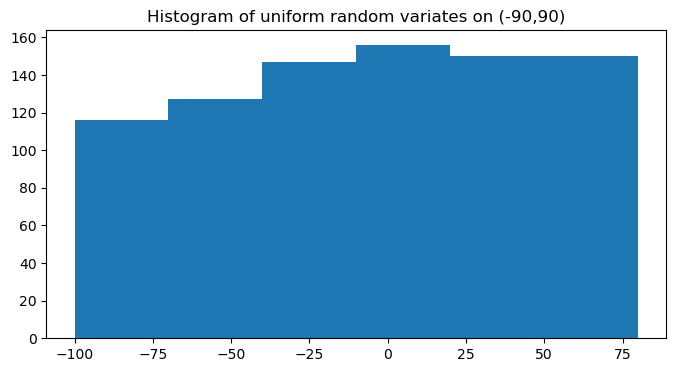

In [112]:
fig, ax=plt.subplots(figsize=(8,4))
plt.title("Histogram of uniform random variates on (-90,90)")
plt.hist(z, bins = np.arange(-100, 100, 30)) 

Text(0.5, 1.0, 'Histogram of uniform random variates on (-90,90)')

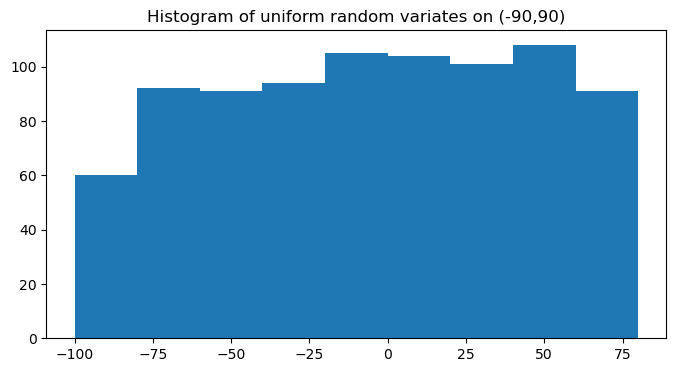

In [113]:
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(z, bins = np.arange(-100, 100, 20)) 
plt.title("Histogram of uniform random variates on (-90,90)")

Text(0.5, 1.0, 'Histogram of uniform random variates on (-90,90)\nWhat could go wrong here?')

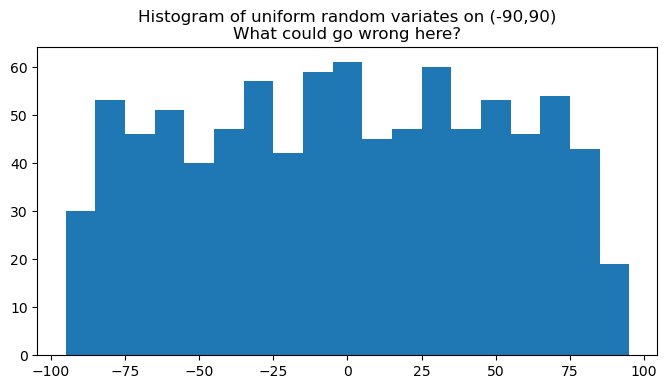

In [117]:
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(z, bins = np.arange(-95, 100, 10))
plt.title("Histogram of uniform random variates on (-90,90)\nWhat could go wrong here?")

Text(0.5, 1.0, 'Histogram of uniform random variates on (-90,90)\nWhat could go wrong here?')

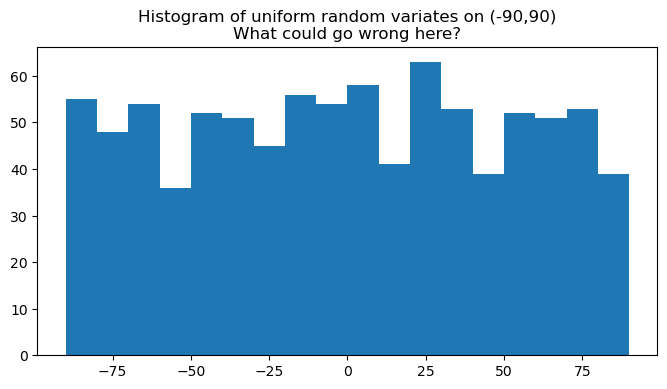

In [118]:
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(z, bins = np.arange(-90, 100, 10))
plt.title("Histogram of uniform random variates on (-90,90)\nWhat could go wrong here?")

In [119]:
max(z), min(z)

(89.85101176779318, -89.925703337085)